In [1]:
%matplotlib notebook

## Philadelphia Housing Analysis - Visualizations Notebook

## 1.) Dependencies and setup

In [2]:
# 1a.) Define imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import folium
import json
from scipy.stats import linregress
import dataframe_image as dfi

# 1b.) Define source data location and source file 
source_file = 'source_data/housing_data_cleaned.csv'

# 1c.) Define output location for visualizations
output_location = 'output/'

## -----------------------------------------------------------------------------------

## 2.) Read in source dataset

In [3]:
# 2a.) Read in source dataset using pd.read_csv
housing_df = pd.read_csv(source_file,low_memory=False)
# 2b.) Verify df load by outputting head
housing_df.head()

basements building_code_description category_code_description  census_tract  \
0         D         ROW 3 STY MASONRY             Single Family         241.0   
1       NaN         ROW 2 STY MASONRY             Single Family         201.0   
2         H   ROW B/GAR 2 STY MASONRY             Single Family         281.0   
3       NaN         ROW 2 STY MASONRY             Single Family         293.0   
4       NaN         ROW 2 STY MASONRY             Single Family          62.0   

  central_air  depth  exempt_building  exempt_land  exterior_condition  \
0           N   67.0            49200            0                 4.0   
1         NaN   70.0                0            0                 4.0   
2           N   95.5                0            0                 4.0   
3         NaN  112.5                0            0                 4.0   
4         NaN   79.0                0            0                 4.0   

   fireplaces  ...  topography total_area  total_livable_area type_heater  \
0         0.0  ...           F     938.00              1344.0           A   
1         0.0  ...           F    1044.00              1190.0         NaN   
2         0.0  ...           F    1686.53              1633.0           B   
3         0.0  ...           F    2165.62              1320.0           B   
4         0.0  ...           F    1264.00               960.0         NaN   

   unit  view_type year_built  year_built_estimate  zip_code  zoning  
0   NaN          I       1895                    Y     19144    RSA5  
1   NaN          I       1940                    Y     19140     RM1  
2   NaN          I       1940                    Y     19141    RSA3  
3   NaN          I       1940                    Y     19124    RSA5  
4   NaN          I       1920                  NaN     19142     RM1  

[5 rows x 41 columns]

## -----------------------------------------------------------------------------------

## 3.) Summary Statistics
    a.)  Prep dataframe to read in from step 2 for outputting a summary statistics table
    b.) Create group by object and summary dataframe
    c.) Reformat data and output

In [4]:
# 3a.) Prep dataframe read in in step 2 for outputting a summary statistics table
# Create column for year of sale
# NOTE: approach taken from https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
housing_df['sale_year'] = pd.DatetimeIndex(housing_df['sale_date']).year
housing_df['sale_year'].value_counts()

2018    16283
2019    15787
2017    15619
2016    14060
2020     6736
Name: sale_year, dtype: int64

In [5]:
# 3b.) Create group by object and summary dataframe
# Create condensed df with just sale price and year to create summary statistics table
summary_df = housing_df[['sale_price','sale_year']]
summary_df = summary_df.rename(columns={'sale_year':'Year'})

# Create groupby object, group by sale year
summary_df_groupby_obj = summary_df.groupby('Year')

# Create summarys stats table
summary_table_df = summary_df_groupby_obj.agg(['count','mean','median','std'])

# Rename columns

summary_table_df.columns = ['Total Number of Sales','Mean Sale Price','Median Sale Price','Standard Deviation of Sale Price']

In [6]:
# 3c.) Reformat data and output
summary_table_df['Total Number of Sales'] = summary_table_df['Total Number of Sales'].map('{:,.0f}'.format)
summary_table_df['Mean Sale Price'] = summary_table_df['Mean Sale Price'].map('${:,.0f}'.format)
summary_table_df['Median Sale Price'] = summary_table_df['Median Sale Price'].map('${:,.0f}'.format)
summary_table_df['Standard Deviation of Sale Price'] = summary_table_df['Standard Deviation of Sale Price'].map('${:,.0f}'.format)

summary_table_df

Total Number of Sales Mean Sale Price Median Sale Price  \
Year                                                           
2016                14,060        $177,132          $125,000   
2017                15,619        $219,403          $140,000   
2018                16,283        $206,449          $155,000   
2019                15,787        $221,614          $153,000   
2020                 6,736        $257,225          $170,000   

     Standard Deviation of Sale Price  
Year                                   
2016                         $240,260  
2017                         $408,161  
2018                         $272,475  
2019                         $433,686  
2020                         $429,846

In [7]:
# 3c.) Output dataframe to png
dfi.export(summary_table_df,'output/3c_summary_table.png')

## -----------------------------------------------------------------------------------

## 4.) Boxplot Analysis
     a.) Boxplot and quartile analysis for population dataset based on sale price
     b.) Boxplot and quartile analysis separated by category description based on sale price
     c.) Boxplot and quartile analysis separated by year based on sale price

<IPython.core.display.Javascript object>


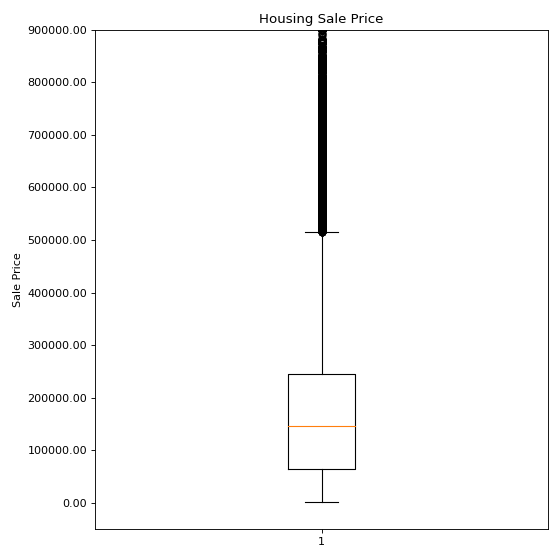

In [8]:
# 4ai.) Create boxplot for population dataset based on sale price

# Create separate dataframe capturing purely sale price
sales = housing_df['sale_price']

# Define boxplot parameters
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.set_title('Housing Sale Price')
ax1.set_ylabel('Sale Price')
ax1.boxplot(sales)

top = 900000
bottom = -50000
ax1.set_ylim(bottom, top)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

loc = ticker.MultipleLocator(base=100000.0) 
ax1.yaxis.set_major_locator(loc)

# Show plot
plt.show()
plt.tight_layout()

# Output plot to png
file_name = '4a_boxplot_population_dataset.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

In [9]:
# 4aii.) Quartile analysis for population dataset based on sale price

# Define quartiles and interquartile range
quartiles = sales.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile of sale price is: {lowerq}")
print(f"The upper quartile of sale price is: {upperq}")
print(f"The interquartile range of sale price is: {iqr}")
print(f"The the median of sale price is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of sale price is: 65000.0
The upper quartile of sale price is: 245000.0
The interquartile range of sale price is: 180000.0
The the median of sale price is: 147000.0 
Values below -205000.0 could be outliers.
Values above 515000.0 could be outliers.


<IPython.core.display.Javascript object>


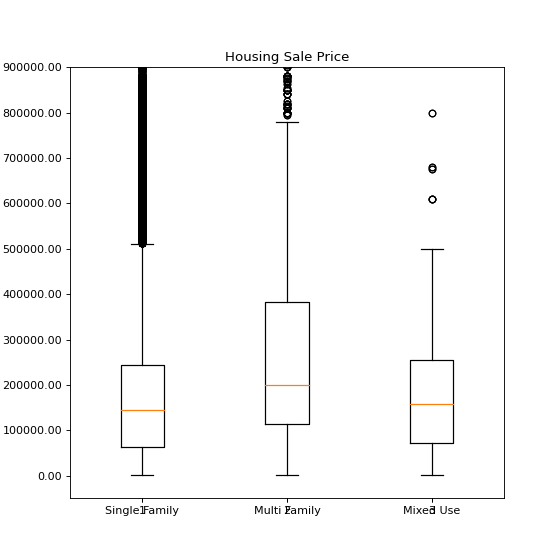

In [10]:
# 4bi.) Create boxplot separated by category code description based on sale price

# Define category code breakouts
code_list = ["Single Family", "Multi Family", "Mixed Use"]

# Group by category code description and save to new dataframe
category_code_list= housing_df.groupby('category_code_description')['sale_price'].apply(list)
category_code_list_df = pd.DataFrame(category_code_list)
category_code_list_df = category_code_list_df.reindex(code_list)
sale_price = [price for price in category_code_list_df['sale_price']]

# Define boxplot parameters
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.set_title('Housing Sale Price')
ax1.set_ylabel('Sale Price')
ax1.boxplot(sale_price)

top = 900000
bottom = -50000
ax1.set_ylim(bottom, top)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

loc = ticker.MultipleLocator(base=100000.0) 
ax1.yaxis.set_major_locator(loc)

# Show plot
plt.boxplot(sale_price, labels=code_list)
plt.show()

# Output plot to png
file_name = '4b_boxplot_category_breakout.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

In [11]:
# 4bii.) Quartile analysis separated by category code list

# Create separate dataframes for each category code
single_family_df = housing_df.loc[housing_df["category_code_description"] == "Single Family",:]['sale_price']
multi_family_df = housing_df.loc[housing_df["category_code_description"] == "Multi Family",:]['sale_price']
mixed_use_df = housing_df.loc[housing_df["category_code_description"] == "Mixed Use",:]['sale_price']

# 4biii.) Quartile analysis for single family based on sale price

# Define quartiles and interquartile range using single_family_df created above
quartiles = single_family_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for single family housing is: {lowerq}")
print(f"The upper quartile sale price for single family housing is: {upperq}")
print(f"The interquartile range for single family housing is: {iqr}")
print(f"The median of sale price for single family housing is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for single family housing is: 64000.0
The upper quartile sale price for single family housing is: 243000.0
The interquartile range for single family housing is: 179000.0
The median of sale price for single family housing is: 145000.0 
Values below -204500.0 could be outliers.
Values above 511500.0 could be outliers.


In [12]:
# 4biv.) Quartile analysis for multi family based on sale price

# Define quartiles and interquartile range using multi_family_df created in step 4bii
quartiles = multi_family_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for multi family housing is: {lowerq}")
print(f"The upper quartile sale price for multi family housing is: {upperq}")
print(f"The interquartile range for multi family housing is: {iqr}")
print(f"The median of sale price for multi family housing is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for multi family housing is: 114932.0
The upper quartile sale price for multi family housing is: 383225.0
The interquartile range for multi family housing is: 268293.0
The median of sale price for multi family housing is: 200000.0 
Values below -287507.5 could be outliers.
Values above 785664.5 could be outliers.


In [13]:
# 4bv.) Quartile analysis for mixed use

# Define quartiles and interquartile range using mixed_ue_df created in step 4bii
quartiles = mixed_use_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for mixed use housing is: {lowerq}")
print(f"The upper quartile sale price for mixed use housing is: {upperq}")
print(f"The interquartile range for mixed use housing is: {iqr}")
print(f"The median of sale price for mixed use housing is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for mixed use housing is: 72500.0
The upper quartile sale price for mixed use housing is: 255000.0
The interquartile range for mixed use housing is: 182500.0
The median of sale price for mixed use housing is: 157000.0 
Values below -201250.0 could be outliers.
Values above 528750.0 could be outliers.


<IPython.core.display.Javascript object>


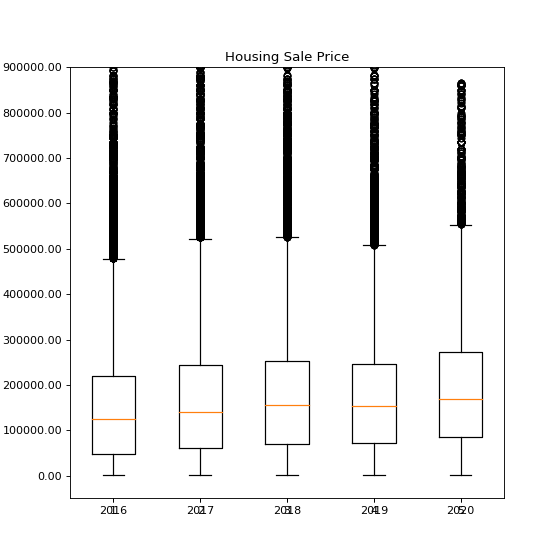

In [14]:
# 4ci.) Create boxplot separated by year based on sale price

# Define year breakouts
year_list = ['2016','2017','2018','2019','2020']

# Group by year and save to new dataframe
sale_year_list= housing_df.groupby('sale_year')['sale_price'].apply(list)
sale_year_list_df = pd.DataFrame(sale_year_list)
# sale_year_list_df = sale_year_list_df.reindex(year_list)
sale_price = [price for price in sale_year_list_df['sale_price']]

# Define boxplot parameters
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.set_title('Housing Sale Price')
ax1.set_ylabel('Sale Price')
ax1.boxplot(sale_price)

top = 900000
bottom = -50000
ax1.set_ylim(bottom, top)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

loc = ticker.MultipleLocator(base=100000.0) 
ax1.yaxis.set_major_locator(loc)

# Show plot
plt.boxplot(sale_price, labels=year_list)
plt.show()

# Output plot to png
file_name = '4c_boxplot_year_breakout.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

In [15]:
# 4cii.) Quartile analysis separated by year

# Create separate dataframes for each category code
year_2016_df = housing_df.loc[housing_df["sale_year"] == 2016,:]['sale_price']
year_2017_df = housing_df.loc[housing_df["sale_year"] == 2017,:]['sale_price']
year_2018_df = housing_df.loc[housing_df["sale_year"] == 2018,:]['sale_price']
year_2019_df = housing_df.loc[housing_df["sale_year"] == 2019,:]['sale_price']
year_2020_df = housing_df.loc[housing_df["sale_year"] == 2020,:]['sale_price']

# 4ciii.) Quartile analysis for 2016 based on sale price

# Define quartiles and interquartile range using single_family_df created above
quartiles = year_2016_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for homes sold in 2016 is: {lowerq}")
print(f"The upper quartile sale price for homes sold in 2016 is: {upperq}")
print(f"The interquartile range for homes sold in 2016 is: {iqr}")
print(f"The median of sale price for homes sold in 2016 is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for homes sold in 2016 is: 47500.0
The upper quartile sale price for homes sold in 2016 is: 220000.0
The interquartile range for homes sold in 2016 is: 172500.0
The median of sale price for homes sold in 2016 is: 125000.0 
Values below -211250.0 could be outliers.
Values above 478750.0 could be outliers.


In [16]:
# 4civ.) Quartile analysis for 2017 based on sale price

# Define quartiles and interquartile range using mixed_ue_df created in step 4bii
quartiles = year_2017_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for homes sold in 2017 is: {lowerq}")
print(f"The upper quartile sale price for homes sold in 2017 is: {upperq}")
print(f"The interquartile range for homes sold in 2017 is: {iqr}")
print(f"The median of sale price for homes sold in 2017 is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for homes sold in 2017 is: 60000.0
The upper quartile sale price for homes sold in 2017 is: 245000.0
The interquartile range for homes sold in 2017 is: 185000.0
The median of sale price for homes sold in 2017 is: 140000.0 
Values below -217500.0 could be outliers.
Values above 522500.0 could be outliers.


In [17]:
# 4cv.) Quartile analysis for 2018 based on sale price

# Define quartiles and interquartile range using mixed_ue_df created in step 4bii
quartiles = year_2018_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for homes sold in 2018 is: {lowerq}")
print(f"The upper quartile sale price for homes sold in 2018 is: {upperq}")
print(f"The interquartile range for homes sold in 2018 is: {iqr}")
print(f"The median of sale price for homes sold in 2018 is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for homes sold in 2018 is: 70000.0
The upper quartile sale price for homes sold in 2018 is: 252000.0
The interquartile range for homes sold in 2018 is: 182000.0
The median of sale price for homes sold in 2018 is: 155000.0 
Values below -203000.0 could be outliers.
Values above 525000.0 could be outliers.


In [18]:
# 4cv.) Quartile analysis for 2019 based on sale price

# Define quartiles and interquartile range using mixed_ue_df created in step 4bii
quartiles = year_2019_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for homes sold in 2019 is: {lowerq}")
print(f"The upper quartile sale price for homes sold in 2019 is: {upperq}")
print(f"The interquartile range for homes sold in 2019 is: {iqr}")
print(f"The median of sale price for homes sold in 2019 is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for homes sold in 2019 is: 71597.5
The upper quartile sale price for homes sold in 2019 is: 246400.0
The interquartile range for homes sold in 2019 is: 174802.5
The median of sale price for homes sold in 2019 is: 153000.0 
Values below -190606.25 could be outliers.
Values above 508603.75 could be outliers.


In [19]:
# 4cv.) Quartile analysis for 2020 based on sale price

# Define quartiles and interquartile range using mixed_ue_df created in step 4bii
quartiles = year_2020_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartile analysis
print(f"The lower quartile sale price for homes sold in 2020 is: {lowerq}")
print(f"The upper quartile sale price for homes sold in 2020 is: {upperq}")
print(f"The interquartile range for homes sold in 2020 is: {iqr}")
print(f"The median of sale price for homes sold in 2020 is: {quartiles[0.5]} ")

# Calculate upper and lower bounds for outlier detection
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print thresholds for potential outliers
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile sale price for homes sold in 2020 is: 85000.0
The upper quartile sale price for homes sold in 2020 is: 272612.5
The interquartile range for homes sold in 2020 is: 187612.5
The median of sale price for homes sold in 2020 is: 170000.0 
Values below -196418.75 could be outliers.
Values above 554031.25 could be outliers.


## -----------------------------------------------------------------------------------

## 5.) 5 Year Trend Analysis
    a.) Create summary dataframe of sale price by year
    b.) Create dataframe with average annual interest rates
    c.) Plot sale price trend and overlay interest rate trend

In [20]:
# 5a.) Create summary dataframe of sale price by year

# Create dataframe to be used for aggregation by year
housing_df_year = housing_df.copy()
housing_df_year['sale_date'] = pd.DatetimeIndex(housing_df['sale_date']).year

# Create groopued dataframe
sale_market = housing_df_year.groupby('sale_date')[['sale_price','market_value']].agg(['mean','median','max','min'])

# Rename columns
sale_market = sale_market.rename(columns = {'sale_price':'Average Sale Price',
                                            'market_value':'Average Market Value',
                                            'mean':'Mean Price',
                                            'median':'Median Price',
                                            'max':'Largest Sale',
                                            'min':'Smallest Sale'})

# Reformat values
sale_market = sale_market.style.format('${:,.2f}')

# Display dataframe
sale_market

In [21]:
# 5b.) Create dataframe with annual interest rates

#### NOTE: annual averages obtained from Freddie Mac website  - pulled as of 5/1/2020
#### http://www.freddiemac.com/pmms/pmms30.html

# Create dataframe
interest_rates = pd.DataFrame({'sale_date':[2020,2019,2018,2017,2016],
'Annual Average':[3.11,3.94,4.54,3.99,3.65]})

# Display dataframe
interest_rates

sale_date  Annual Average
0       2020            3.11
1       2019            3.94
2       2018            4.54
3       2017            3.99
4       2016            3.65

<IPython.core.display.Javascript object>


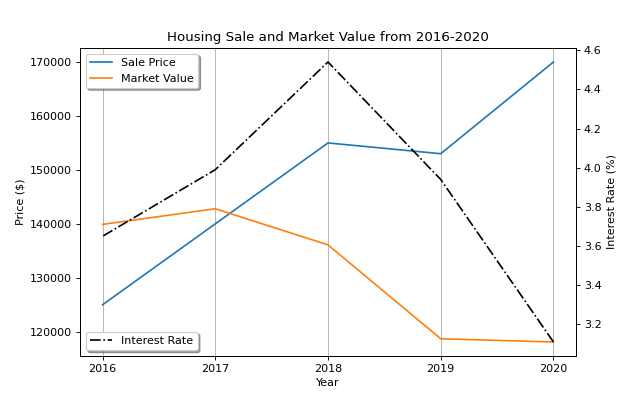

In [22]:
# 5c.) Plot trends of median sale prices and interest rates

# Create dataframe grouping by median
# Define xlabels, and interest rate data
sale_data = housing_df_year.groupby('sale_date')[['sale_price','market_value']].agg(['median'])
xticks = housing_df_year['sale_date'].unique()
ir_data = interest_rates['Annual Average']

# Plot configuration
fig,ax1 = plt.subplots(figsize=(8,5))
ax2=ax1.twinx()

# Plot sale price and Market value over time
ax1.plot(sale_data, label=['Sale Price','Market Value'],ls='-')
ax1.set_xlabel('Year'), ax1.set_ylabel('Price ($)')
ax1.set_title('Housing Sale and Market Value from 2016-2020')
ax1.legend(loc='upper left',shadow=True)
ax1.grid(axis='x')

# Overlay interest rate data
ax2.plot(xticks,ir_data,'k',label='Interest Rate',ls='-.')
ax2.set_xlabel('Year'), ax2.set_ylabel('Interest Rate (%)')
ax2.legend(loc='lower left',shadow=True)

# Show plot
plt.xticks(xticks)
plt.show()

# Output plot to png
file_name = '5c_5_year_trend.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

## -----------------------------------------------------------------------------------

## 6.) Zip Code Analysis
    a.) Count of sales by zip code across all 5 years
    b.) Average sale price by zip code across all 5 years
    c.) Count of sales broken out by year

In [23]:
# 6a.) Count of sales across all 5 years by zip code
# ------
# 6ai.) Create dataframe to be used in map generation

# Create trimmed dataset with just fields necessary for map
salesCount = housing_df[['zip_code','sale_price']]
# Drop NA
salesCount = salesCount.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
salesCount['zip_code'] = salesCount['zip_code'].astype('Int64').astype('str')

# Create groupby object
salesCount_groupby = salesCount.groupby('zip_code')

# Create grouped data frame with count of sale
salesCount_groupbyDF = salesCount_groupby.count()
# Reset index as folium choropleth requires fields to be columns
salesCount_groupbyDF = salesCount_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
salesCount_groupbyDF = salesCount_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
salesCount_groupbyDF = salesCount_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
salesCount_groupbyDF.head()

zip_code  sale_price
0    19102          16
1    19103         223
2    19104         640
3    19106          47
4    19107          67

In [24]:
# 6aii.) Create map based off of count of sales for all 5 years
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=salesCount_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Number of Sales by Zip Code'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6a_count_sales_population_dataset.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m



C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [25]:
# 6b.) Average sale price by zip code across all 5 years
# ------
# 6bi.) Create dataframe to be used in map generation

# Create trimmed dataset with just fields necessary for map
salesAvg = housing_df[['zip_code','sale_price']]
# Drop NA
salesAvg = salesAvg.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
salesAvg['zip_code'] = salesAvg['zip_code'].astype('Int64').astype('str')

# Create groupby object
salesAvg_groupby = salesAvg.groupby('zip_code')

# Create grouped data frame with count of sale
salesAvg_groupbyDF = salesAvg_groupby.mean()
# Reset index as folium choropleth requires fields to be columns
salesAvg_groupbyDF = salesAvg_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
salesAvg_groupbyDF = salesAvg_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
salesAvg_groupbyDF = salesAvg_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
salesAvg_groupbyDF.head()

zip_code    sale_price
0    19102  9.102812e+05
1    19103  1.340693e+06
2    19104  2.709431e+05
3    19106  1.040698e+06
4    19107  9.797343e+05

In [26]:
# 6bii.) Create map based off of average sale price for all 5 years
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=salesAvg_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Average Home Sale Prices by Zip Code'
)

folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6b_average_sale_price_population_dataset.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [27]:
# 6c.) Count of sales by zip code across broken out by year
# ------
# 6ci.) Create dataframe to be used in map generation for 2020

# Create trimmed dataset with just fields necessary for map
saleDate = housing_df[['zip_code', 'sale_date','sale_price']]
# Drop NA
saleDate = saleDate.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
saleDate['zip_code'] = saleDate['zip_code'].astype('Int64').astype('str')

# Filter dataframe for specific year
saleDate2020 = saleDate[(saleDate['sale_date'] >= '2019-12-31') & (saleDate['sale_date'] <= '2020-12-31')]

# Create groupby object
saleDate2020_groupby = saleDate2020.groupby('zip_code')

# Create grouped data frame with count of sale
saleDate2020count_groupbyDF = saleDate2020_groupby.count()
# Reset index as folium choropleth requires fields to be columns
saleDate2020count_groupbyDF = saleDate2020count_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
saleDate2020count_groupbyDF = saleDate2020count_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
saleDate2020count_groupbyDF = saleDate2020count_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
saleDate2020count_groupbyDF.head()

zip_code  sale_date  sale_price
0    19102        1.0           1
1    19103       10.0          10
2    19104       65.0          65
3    19106        5.0           5
4    19107        4.0           4

In [28]:
# 6cii.) Create map based off of count of sales for 2020
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=saleDate2020count_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Total Home Sales by Zip Code, 2020'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6c_count_sales_2020.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [29]:
# 6ciii.) Create dataframe to be used in map generation for 2019

# Create trimmed dataset with just fields necessary for map
saleDate = housing_df[['zip_code', 'sale_date','sale_price']]
# Drop NA
saleDate = saleDate.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
saleDate['zip_code'] = saleDate['zip_code'].astype('Int64').astype('str')

# Filter dataframe for specific year
saleDate2019 = saleDate[(saleDate['sale_date'] >= '2018-12-31') & (saleDate['sale_date'] <= '2019-12-31')]

# Create groupby object
saleDate2019_groupby = saleDate2019.groupby('zip_code')

# Create grouped data frame with count of sale
saleDate2019count_groupbyDF = saleDate2019_groupby.count()
# Reset index as folium choropleth requires fields to be columns
saleDate2019count_groupbyDF = saleDate2019count_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
saleDate2019count_groupbyDF = saleDate2019count_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
saleDate2019count_groupbyDF = saleDate2019count_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
saleDate2019count_groupbyDF.head()

zip_code  sale_date  sale_price
0    19102        1.0           1
1    19103       26.0          26
2    19104      145.0         145
3    19106       13.0          13
4    19107        9.0           9

In [30]:
# 6civ.) Create map based off of count of sales for 2019
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=saleDate2019count_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Total Home Sales by Zip Code, 2019'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6c_count_sales_2019.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [31]:
# 6cv.) Create dataframe to be used in map generation for 2018

# Create trimmed dataset with just fields necessary for map
saleDate = housing_df[['zip_code', 'sale_date','sale_price']]
# Drop NA
saleDate = saleDate.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
saleDate['zip_code'] = saleDate['zip_code'].astype('Int64').astype('str')

# Filter dataframe for specific year
saleDate2018 = saleDate[(saleDate['sale_date'] >= '2017-12-31') & (saleDate['sale_date'] <= '2018-12-31')]

# Create groupby object
saleDate2018_groupby = saleDate2018.groupby('zip_code')

# Create grouped data frame with count of sale
saleDate2018count_groupbyDF = saleDate2018_groupby.count()
# Reset index as folium choropleth requires fields to be columns
saleDate2018count_groupbyDF = saleDate2018count_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
saleDate2018count_groupbyDF = saleDate2018count_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
saleDate2018count_groupbyDF = saleDate2018count_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
saleDate2018count_groupbyDF.head()

zip_code  sale_date  sale_price
0    19102        4.0           4
1    19103       45.0          45
2    19104      168.0         168
3    19106        7.0           7
4    19107       24.0          24

In [32]:
# 5cvi.) Create map based off of count of sales for 2018
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=saleDate2018count_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Total Home Sales by Zip Code, 2018'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6c_count_sales_2018.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [33]:
# 6cvii.) Create dataframe to be used in map generation for 2017

# Create trimmed dataset with just fields necessary for map
saleDate = housing_df[['zip_code', 'sale_date','sale_price']]
# Drop NA
saleDate = saleDate.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
saleDate['zip_code'] = saleDate['zip_code'].astype('Int64').astype('str')

# Filter dataframe for specific year
saleDate2017 = saleDate[(saleDate['sale_date'] >= '2016-12-31') & (saleDate['sale_date'] <= '2017-12-31')]

# Create groupby object
saleDate2017_groupby = saleDate2017.groupby('zip_code')

# Create grouped data frame with count of sale
saleDate2017count_groupbyDF = saleDate2017_groupby.count()
# Reset index as folium choropleth requires fields to be columns
saleDate2017count_groupbyDF = saleDate2017count_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
saleDate2017count_groupbyDF = saleDate2017count_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
saleDate2017count_groupbyDF = saleDate2017count_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
saleDate2017count_groupbyDF.head()

zip_code  sale_date  sale_price
0    19102        5.0           5
1    19103      103.0         103
2    19104      130.0         130
3    19106       20.0          20
4    19107       10.0          10

In [34]:
# 6cviii.) Create map based off of count of sales for 2017
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=saleDate2017count_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Total Home Sales by Zip Code, 2017'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6c_count_sales_2017.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [35]:
# 6cix.) Create dataframe to be used in map generation for 2016

# Create trimmed dataset with just fields necessary for map
saleDate = housing_df[['zip_code', 'sale_date','sale_price']]
# Drop NA
saleDate = saleDate.dropna(how='any')

# Convert zip codes to strings so that folium package (used to create choropleth map) can read them properly
saleDate['zip_code'] = saleDate['zip_code'].astype('Int64').astype('str')

# Filter dataframe for specific year
saleDate2016 = saleDate[(saleDate['sale_date'] >= '2015-12-31') & (saleDate['sale_date'] <= '2016-12-31')]

# Create groupby object
saleDate2016_groupby = saleDate2016.groupby('zip_code')

# Create grouped data frame with count of sale
saleDate2016count_groupbyDF = saleDate2016_groupby.count()
# Reset index as folium choropleth requires fields to be columns
saleDate2016count_groupbyDF = saleDate2016count_groupbyDF.reset_index()

# Add zip codes 19109 and 19102, so that GeoJSON will work - not in original df but in GeoJSON file
saleDate2016count_groupbyDF = saleDate2016count_groupbyDF.append({'zip_code':'19109','sale_price':0},ignore_index=True)
saleDate2016count_groupbyDF = saleDate2016count_groupbyDF.append({'zip_code':'19112','sale_price':0},ignore_index=True)

# Show dataframe creation result
saleDate2016count_groupbyDF.head()

zip_code  sale_date  sale_price
0    19102        5.0           5
1    19103       39.0          39
2    19104      132.0         132
3    19106        2.0           2
4    19107       20.0          20

In [36]:
# 6cx.) Create map based off of count of sales for 2016
# Read in GeoJson file to be used with map
with open('source_data/Zipcodes_Poly.geojson','r') as jsonFile:
    data = json.load(jsonFile)
    
# Create folium map
m = folium.Map(location=[39.9526, -75.1652],zoom_start=11)
m.choropleth(
    geo_data=data,
    fill_opacity=0.7,
    line_opacity=0.2,
    data=saleDate2016count_groupbyDF,
    key_on='feature.properties.CODE',
    columns=['zip_code','sale_price'],
    fill_color='YlGnBu',
    legend_name='Total Home Sales by Zip Code, 2016'
)
folium.LayerControl().add_to(m)

# Output map as html file
file_name = '6c_count_sales_2016.html'
output_string = f'{output_location}{file_name}'
m.save(output_string)

# Display map
m

C:\Users\12015\anaconda3\envs\PythonData\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## -----------------------------------------------------------------------------------

## 7.) Scatter Plot Analysis
    a.) Plot of sales vs total livable area (sq. ft.)
    b.) Plot of sales vs number of rooms

<IPython.core.display.Javascript object>


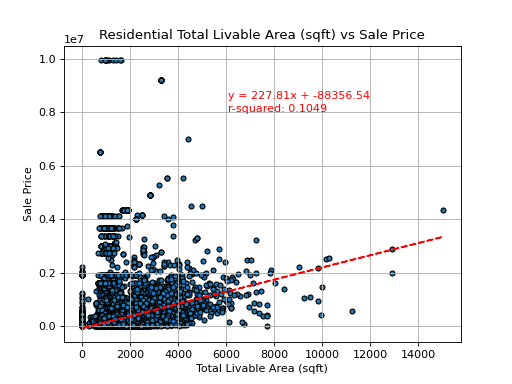

In [37]:
# 7ai.) Create scatter plot of total livable area vs sale price
# Create plot
livable_area_vs_price_single_scatter = housing_df.plot.scatter(x='total_livable_area',y='sale_price',grid=True,edgecolors='black')
# Set labels
livable_area_vs_price_single_scatter.set_xlabel("Total Livable Area (sqft)")
livable_area_vs_price_single_scatter.set_ylabel("Sale Price")
livable_area_vs_price_single_scatter.set_title("Residential Total Livable Area (sqft) vs Sale Price")

# Show plot
plt.show()

# Output plot to png
file_name = '7a_livable_area_vs_price.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

In [38]:
# 7aii.) Regression analysis for total liveable area vs sale price

# Create series for independent and dependent variables
total_livable_area = housing_df['total_livable_area']
sale_price = housing_df['sale_price']

# Create linear regression model
calc_slope, calc_int, calc_r, calc_p, calc_std_err = linregress(total_livable_area, sale_price)
line_best_fit = calc_slope * total_livable_area + calc_int

# Add line of best fit to above plot
plt.plot(total_livable_area,line_best_fit,'r--')

# Add regression equation and r^2 value to above plot
line_eq = "y = " + str(round(calc_slope,2)) + "x + " + str(round(calc_int,2))
plt.annotate(line_eq,(6100,8500000),fontsize=10,color="red")
r_squared = calc_r ** 2
plt.annotate('r-squared: ' + str(round(r_squared,4)),(6100,8000000),fontsize=10,color="red")

# Output plot to png
file_name = '7a_livable_area_vs_price_regression.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

<IPython.core.display.Javascript object>


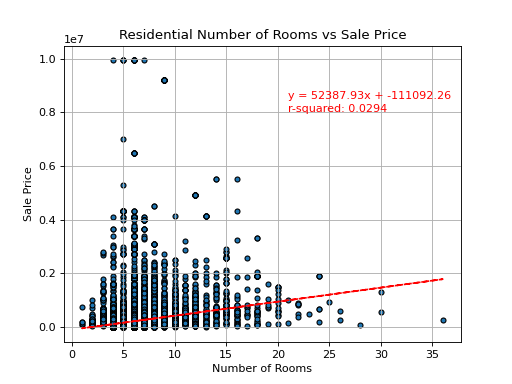

In [39]:
# 7bi.) Create scatter plot of number of rooms vs sale price
# Create plot
number_rooms_vs_price_single_scatter = housing_df.plot.scatter(x='number_of_rooms',y='sale_price',grid=True,edgecolors='black')
# Set labels
number_rooms_vs_price_single_scatter.set_xlabel("Number of Rooms")
number_rooms_vs_price_single_scatter.set_ylabel("Sale Price")
number_rooms_vs_price_single_scatter.set_title("Residential Number of Rooms vs Sale Price")

# Show plot
plt.show()

# Output plot to png
file_name = '7b_number_rooms_vs_price.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

In [40]:
# 7bii.) Regression analysis for number of rooms vs sale price

# Create series for independent and dependent variables
number_of_rooms = housing_df['number_of_rooms']
sale_price = housing_df['sale_price']

# Create linear regression model
calc_slope, calc_int, calc_r, calc_p, calc_std_err = linregress(number_of_rooms, sale_price)
line_best_fit = calc_slope * number_of_rooms + calc_int

# Add line of best fit to above plot
plt.plot(number_of_rooms,line_best_fit,'r--')

# Add regression equation and r^2 value to above plot
line_eq = "y = " + str(round(calc_slope,2)) + "x + " + str(round(calc_int,2))
plt.annotate(line_eq,(21,8500000),fontsize=10,color="red")
r_squared = calc_r ** 2
plt.annotate('r-squared: ' + str(round(r_squared,4)),(21,8000000),fontsize=10,color="red")

# Output plot to png
file_name = '7b_number_rooms_vs_price_regression.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)

## -----------------------------------------------------------------------------------

## 8.) Pie Chart Analysis
    a.) Total number of sales by year built

In [62]:
# 8ai.) Create dataframe to be used for pie chart visualization

# Create trimmed dataset with just fields necessary pie chart
binned_df = housing_df[['year_built','sale_price']]

# Define bins for year built
bins = [1600,1899,1919,1939,1959,1979,1999,2019,1000000000]

# Use pd.cut function to create bins and add to dataframe
binned_df['age_band'] = pd.cut(binned_df['year_built'], bins)

# Display datafame with age bands
binned_df.head()

<ipython-input-62-52bcc38ad3fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binned_df['age_band'] = pd.cut(binned_df['year_built'], bins)


year_built  sale_price      age_band
0        1895       90000  (1600, 1899]
1        1940       52500  (1939, 1959]
2        1940      154000  (1939, 1959]
3        1940       65900  (1939, 1959]
4        1920       47000  (1919, 1939]

In [63]:
# 8aii.) Create groupby object and aggregate properties by age band

# Create groupby object
binned_groupby = binned_df.groupby('age_band')

# Created new grouped df by age band
binned_groupby_df = binned_groupby.count()

# Reset index so that age band can be used as column in plot function
binned_groupby_df = binned_groupby_df.reset_index()

# Display grouped dataframe
binned_groupby_df

age_band  year_built  sale_price
0        (1600, 1899]        1369        1369
1        (1899, 1919]        6625        6625
2        (1919, 1939]       34859       34859
3        (1939, 1959]       15124       15124
4        (1959, 1979]        4872        4872
5        (1979, 1999]         730         730
6        (1999, 2019]        4894        4894
7  (2019, 1000000000]           1           1

<IPython.core.display.Javascript object>


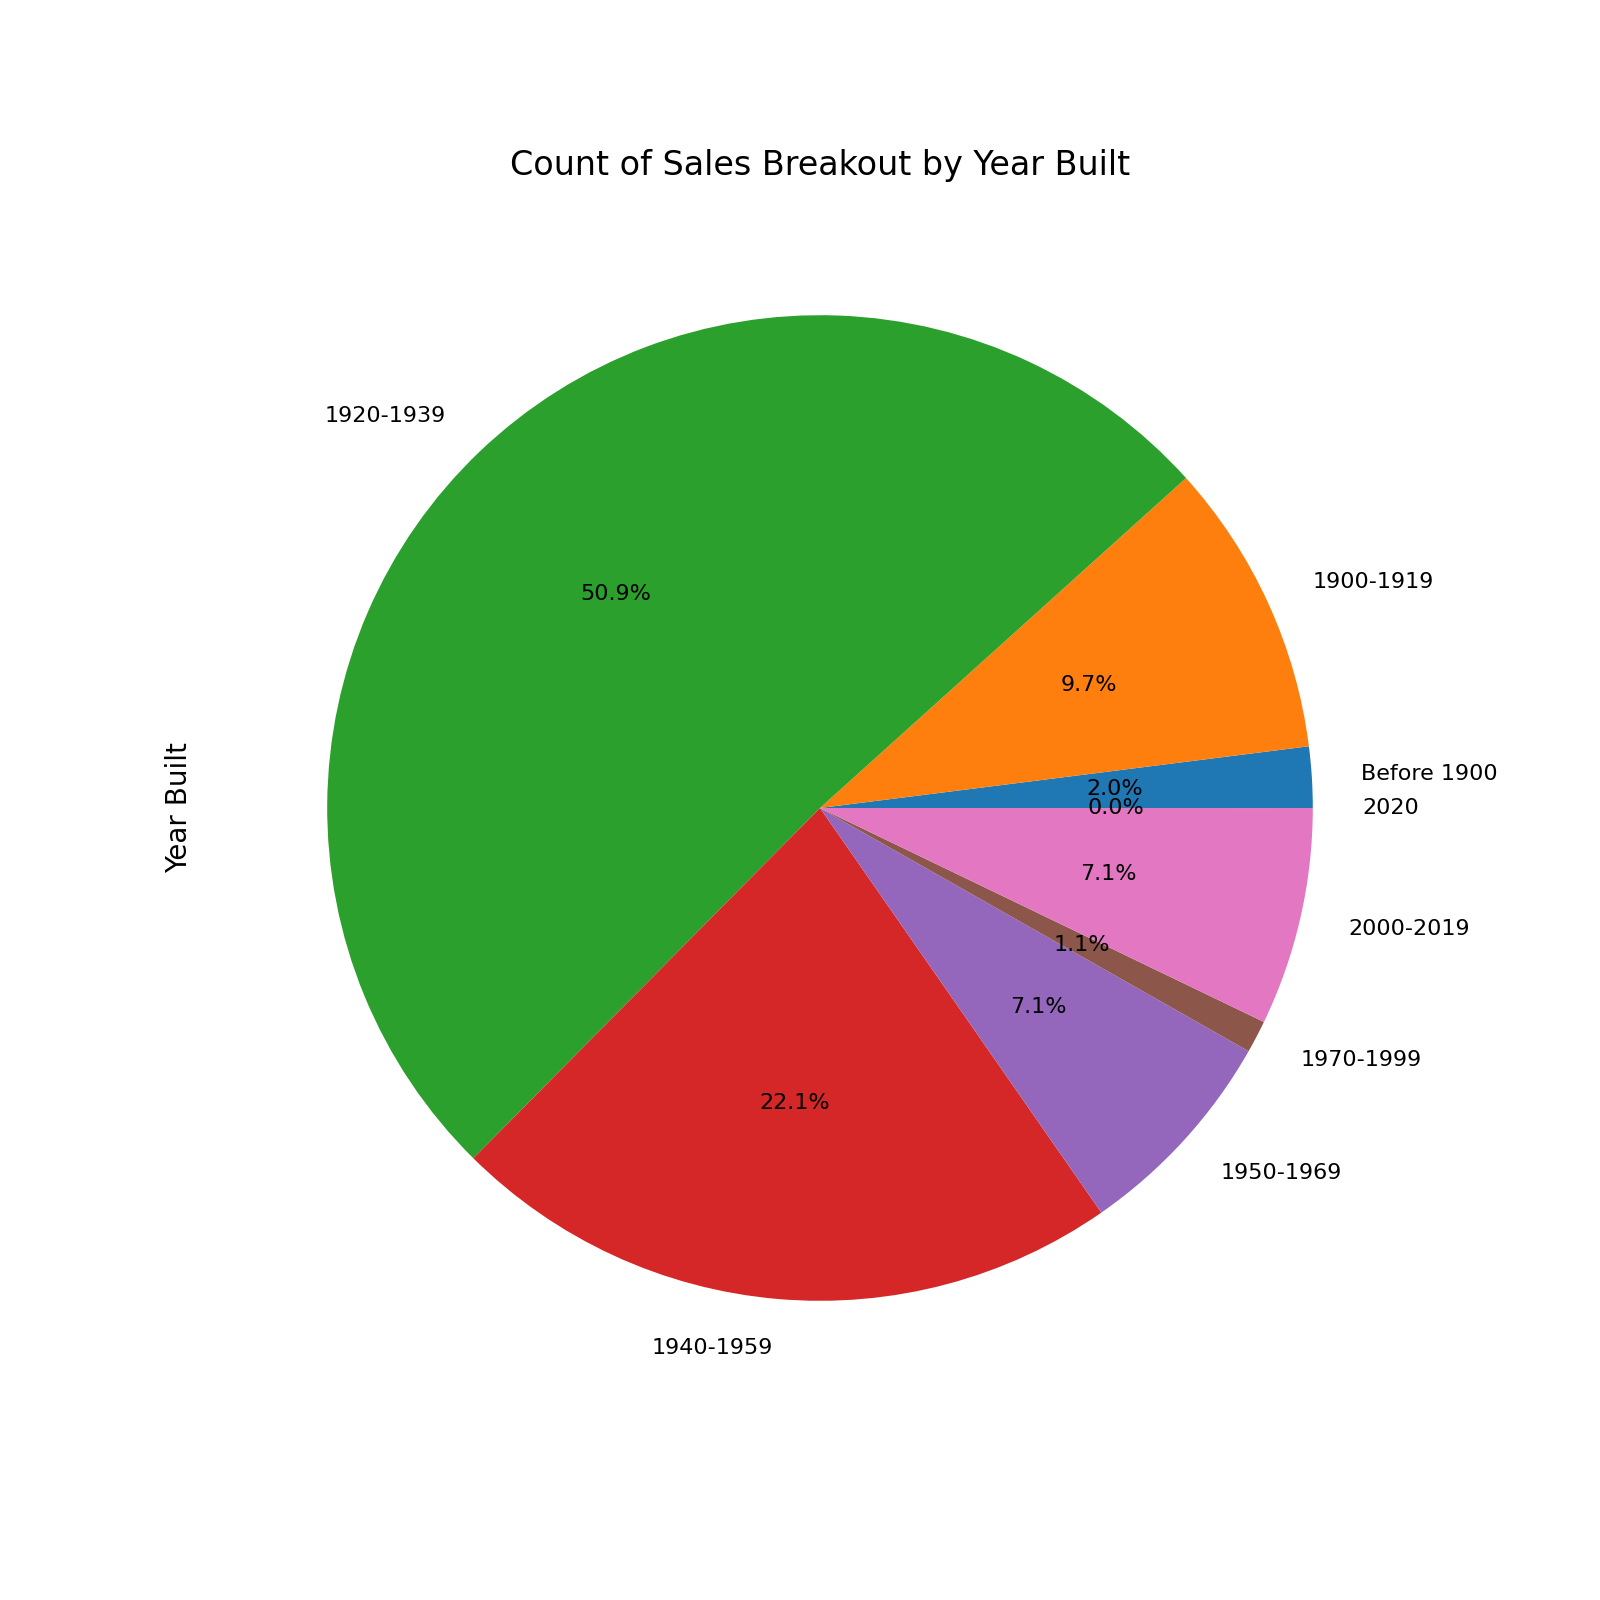

In [66]:
# 8aiii.) Create pie chart based off of grouped dataframe

# Define labels for bins to be used in pie chart display
labels = ['Before 1900','1900-1919','1920-1939','1940-1959','1950-1969','1970-1999','2000-2019','2020']

# Create pie plot
binned_groupby_df.plot(kind='pie',y='year_built',legend=False,labels=labels,autopct='%1.1f%%',figsize=(8,8),textprops={'fontsize': 8})


# Set title
plt.title("Count of Sales Breakout by Year Built")

# Set ylabel
plt.ylabel('Year Built')

# Output plot to png
file_name = '8a_count_of_sales_year_built.png'
output_string = f'{output_location}{file_name}'
plt.savefig(output_string)